<center><h1>Predictive Modeling - Baseline Models</h1></center>
This Jupyter Notebook contains the 3 regression models using all attributes of the prepared dataset (seoul_bike_data_prepared.csv). Namely, linear regression, regression tree, and k-nearest neighbours. Since all attributes of the dataset will be used in the regression analyses, I have therefore named these as baseline models. 10-fold cross validation will be used.

The intent is to compare these baseline models with selected features models in terms of model performance. Selected features models in this case means regression models that I will build with only attributes that are deemed statistically significant.

#### Prepared Dataset

In [2]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [3]:
# Read in the dataset
seoul_bike = pd.read_csv("seoul_bike_data_prepared.csv", encoding="utf-8")
seoul_bike.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1


#### 1. Linear Regression Model

In [4]:
# Assign the target variable, independent variables, and desired performance metrics
target_name = "Rented Bike Count"
target_variable = seoul_bike[target_name]
independent_variables = seoul_bike.drop(columns=target_name)
performance_metrics = ["r2", "neg_root_mean_squared_error", "neg_mean_absolute_error"]

In [5]:
# Build the linear regression model and use cross validation
lr_model = LinearRegression()
lr_scores = cross_validate(
    estimator=lr_model,
    X=independent_variables,
    y=target_variable,
    cv=10,
    scoring=performance_metrics
)
lr_scores


{'fit_time': array([0.01155519, 0.0045011 , 0.00401855, 0.0040009 , 0.00402284,
        0.00400305, 0.00452137, 0.00350046, 0.00451279, 0.00401044]),
 'score_time': array([0.00201273, 0.00149941, 0.0010004 , 0.0010004 , 0.00149989,
        0.00150108, 0.0009985 , 0.0010035 , 0.00149918, 0.00102329]),
 'test_r2': array([-12.37966   ,  -4.18163805,  -0.37609285,   0.45292654,
          0.06343567,  -0.01655934,  -0.01606348,   0.44079453,
          0.57989526,   0.41778741]),
 'test_neg_root_mean_squared_error': array([-572.20720111, -270.87176628, -360.12129946, -385.88570039,
        -706.69277924, -791.0456306 , -583.69217493, -514.45991858,
        -457.16038902, -374.40065613]),
 'test_neg_mean_absolute_error': array([-497.93935515, -230.05636989, -289.2433827 , -304.93846573,
        -543.31749225, -598.69609858, -504.0723804 , -425.02535882,
        -346.68697398, -272.11677486])}

In [6]:
# Array of performance metrics scores
# Note: abs() is applied to scores returned by sklearn that are the negative value of the metric
lr_r2_scores = lr_scores["test_r2"]
lr_root_mean_squared_error_scores = abs(lr_scores["test_neg_root_mean_squared_error"])
lr_mean_absolute_error_scores = abs(lr_scores["test_neg_mean_absolute_error"])


In [7]:
# Dataframe capturing the overall performance metrics of the linear regression model
lr_metrics = pd.DataFrame(
    {
        "Model": ["Linear Regression"],
        "R Squared": lr_r2_scores.mean(),
        "Root Mean Squared Error": lr_root_mean_squared_error_scores.mean(),
        "Mean Absolute Error": lr_mean_absolute_error_scores.mean(),
    }
)
lr_metrics


,Model,R Squared,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,-1.501517,501.653752,401.209265


#### 2. Regression Tree Model

In [8]:
# Build the regression tree model and use cross validation
# random_state is set to 3 for reproducibility
rt_model = DecisionTreeRegressor(random_state=3)
rt_scores = cross_validate(
    estimator=rt_model,
    X=independent_variables,
    y=target_variable,
    cv=10,
    scoring=performance_metrics
)
rt_scores

{'fit_time': array([0.04061127, 0.0391283 , 0.04418612, 0.04155159, 0.04010677,
        0.04256129, 0.04359698, 0.03919291, 0.03850412, 0.04002833]),
 'score_time': array([0.00201488, 0.00149965, 0.00149894, 0.00150299, 0.00150299,
        0.00150061, 0.00149894, 0.00150061, 0.00149941, 0.00149941]),
 'test_r2': array([ 0.11716893, -0.35848985, -0.01613418,  0.11199505,  0.63390278,
         0.64301151,  0.46790528,  0.58146458,  0.71809834,  0.38548109]),
 'test_neg_root_mean_squared_error': array([-146.98383877, -138.69423269, -309.45711228, -491.63586313,
        -441.83494511, -468.77266399, -422.39417766, -445.07371382,
        -374.48861783, -384.64795771]),
 'test_neg_mean_absolute_error': array([-108.02739726,  -96.21347032, -186.07191781, -322.14383562,
        -311.36757991, -325.85388128, -279.55821918, -300.53082192,
        -229.55365297, -263.68378995])}

In [9]:
# Array of performance metrics scores
# Note: abs() is applied to scores returned by sklearn that are the negative value of the metric
rt_r2_scores = rt_scores["test_r2"]
rt_root_mean_squared_error_scores = abs(rt_scores["test_neg_root_mean_squared_error"])
rt_mean_absolute_error_scores = abs(rt_scores["test_neg_mean_absolute_error"])

In [10]:
# Dataframe capturing the overall performance metrics of the regression tree model
rt_metrics = pd.DataFrame(
    {
        "Model": ["Regression Tree"],
        "R Squared": rt_r2_scores.mean(),
        "Root Mean Squared Error": rt_root_mean_squared_error_scores.mean(),
        "Mean Absolute Error": rt_mean_absolute_error_scores.mean(),
    }
)
rt_metrics


,Model,R Squared,Root Mean Squared Error,Mean Absolute Error
0,Regression Tree,0.32844,362.398312,242.300457


#### 3. K-Nearest Neighbours Model

In [11]:
# Build the k-nearest neighbours model and use cross validation
# I will use a range of k values (1 to 20) to determine which k contributes to the best performing model

# Create empty lists to append each metric
knn_k = []
knn_r2 = []
knn_root_mean_squared_error = []
knn_mean_absolute_error = []

for k in range(1, 21):
    knn_model = KNeighborsRegressor(n_neighbors = k)
    knn_scores = cross_validate(
        estimator=knn_model,
        X=independent_variables,
        y=target_variable,
        cv=10,
        scoring=performance_metrics
    )
    
    # Array of performance metrics scores
    # Note: abs() is applied to scores returned by sklearn that are the negative value of the metric
    knn_r2_scores = knn_scores["test_r2"]
    knn_root_mean_squared_error_scores = abs(knn_scores["test_neg_root_mean_squared_error"])
    knn_mean_absolute_error_scores = abs(knn_scores["test_neg_mean_absolute_error"])
    
    # Average the scores from each fold of the cross validation
    # Append the metrics to lists
    knn_k.append(k)
    knn_r2.append(knn_r2_scores.mean())
    knn_root_mean_squared_error.append(knn_root_mean_squared_error_scores.mean())
    knn_mean_absolute_error.append(knn_mean_absolute_error_scores.mean())

In [12]:
# Dataframe capturing the overall performance metrics of the k-nearest neighbours model
knn_metrics = pd.DataFrame(
    {
        "Model": "K-Nearest Neighbours",
        "k": knn_k,
        "R Squared": knn_r2,
        "Root Mean Squared Error": knn_root_mean_squared_error,
        "Mean Absolute Error": knn_mean_absolute_error,
    }
)
knn_metrics


,Model,k,R Squared,Root Mean Squared Error,Mean Absolute Error
0,K-Nearest Neighbours,1,-1.085467,596.061047,424.247146
1,K-Nearest Neighbours,2,-0.586315,528.561680,386.013185
2,K-Nearest Neighbours,3,-0.400623,502.123941,369.978729
3,K-Nearest Neighbours,4,-0.284610,483.807584,358.960674
4,K-Nearest Neighbours,5,-0.251234,475.589239,353.850411
5,K-Nearest Neighbours,6,-0.210121,469.568640,350.092028
6,K-Nearest Neighbours,7,-0.179231,466.370528,348.113258
7,K-Nearest Neighbours,8,-0.169162,464.046049,346.585873
8,K-Nearest Neighbours,9,-0.158443,462.093335,346.519673
9,K-Nearest Neighbours,10,-0.156480,461.219524,346.696370


<AxesSubplot: title={'left': 'k-Nearest Neighbours: Optimal k Value'}, xlabel='k', ylabel='R Squared'>

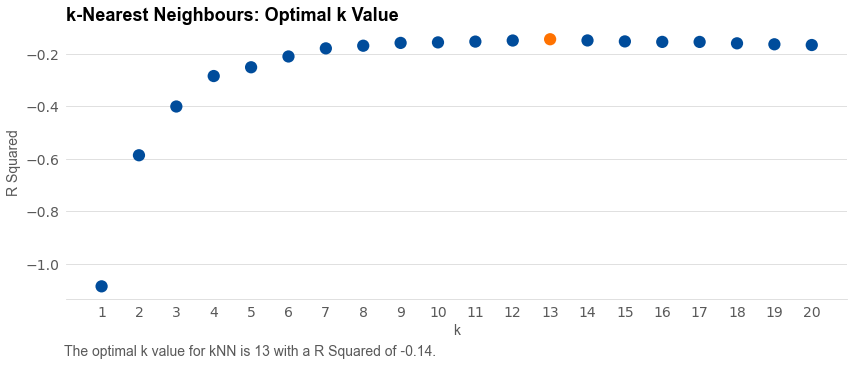

In [13]:
# Plot the k values by R squared to visualize the performance of each k-nearest neighbours model
value_r2 = knn_metrics["R Squared"] == knn_metrics["R Squared"].max()
knn_metrics["colour_r2"] = np.where(value_r2 == True, "#FF7200", "#004C9B")
knn_plt = sns.regplot(
    data=knn_metrics,
    x="k",
    y="R Squared",
    fit_reg=False,
    scatter_kws={
        "alpha": 1,
        "facecolors": knn_metrics["colour_r2"],
        "linewidths": 0,
        "s": 150,
        "zorder": 10,
    }
)

# Add title
knn_plt.set_title(
    "k-Nearest Neighbours: Optimal k Value",
    font="Arial",
    fontsize="18",
    fontweight="bold",
    loc="left"
)

# X-axis
plt.xlabel(
    "k", color="#595959", font="Arial", fontsize="14", horizontalalignment="center"
)

# Y-axis
plt.ylabel(
    "R Squared",
    color="#595959",
    font="Arial",
    fontsize="14",
    horizontalalignment="center"
)

# Ticks
plt.xticks(range(int(knn_metrics["k"].min()), int(knn_metrics["k"].max()) + 1, 1))
plt.tick_params(colors="#595959", bottom=False, left=False, labelsize="14")

# Add horizontal gridlines
plt.grid(axis="y", color="#D9D9D9")

# Set plot size
knn_plt.figure.set_size_inches(14, 5)

# Spines
sns.despine(left=True)
for _, s in knn_plt.spines.items():
    s.set_color("#D9D9D9")

# Get row with max R squared
max_y_row = knn_metrics.loc[knn_metrics["R Squared"].idxmax()]

# Get the max R squared value and the corresponding x value
max_y_value = np.round(max_y_row["R Squared"], 2)
corresponding_x_value = np.round(max_y_row["k"], 2)

# Add a caption
plt.text(
    0,
    -1.35,
    f"The optimal k value for kNN is {corresponding_x_value} with a R Squared of {max_y_value}.",
    color="#595959",
    font="Arial",
    fontsize="14"
)

knn_plt


In [14]:
# For the k-nearest neighbours models, I will choose the one with the highest R squared value
knn_metrics_sorted = knn_metrics.sort_values("R Squared", ascending=False)
knn_metrics_sorted.drop(columns=["k", "colour_r2"], inplace=True)

# Subset the dataframe to keep the record with the highest R Squared
highest_knn_metrics = knn_metrics_sorted.head(1)
highest_knn_metrics

,Model,R Squared,Root Mean Squared Error,Mean Absolute Error
12,K-Nearest Neighbours,-0.144513,457.627993,345.872111


#### Performance Metrics
The performance metrics of all regression models are displayed below as a pandas dataframe and a Tableau visualization.

In [15]:
# Create a baseline_metrics dataframe to capture the performance metrics of all regression models
baseline_metrics = pd.concat([lr_metrics, rt_metrics, highest_knn_metrics])
baseline_metrics.reset_index(drop=True, inplace=True)
baseline_metrics

,Model,R Squared,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,-1.501517,501.653752,401.209265
1,Regression Tree,0.328440,362.398312,242.300457
2,K-Nearest Neighbours,-0.144513,457.627993,345.872111


In [16]:
# Export the baseline_metrics dataframe to a .csv flat file
baseline_metrics.to_csv("baseline_metrics.csv", index=False)

![Baseline Metrics Tableau Visualization](baseline_metrics_tableau.PNG "Baseline Metrics")

Based on the performance metrics of each model, the regression tree model is the best performing, followed by k-nearest neighbours in second place, and linear regression being last place. Notably, the R squared values for both k-nearest neighbours and linear regression are negative. As per the sklearn module, the best score for the R squared is 1.0 and a negative score means that the regression model is arbitrarily worse. In terms of the error metrics, root mean squared error and mean absolute error, the lower the error values the better performing the models are.

Therefore, it can be concluded that using all features of the prepared dataset is suboptimal for regression tree, and provides very poor performance for the k-nearest neighbours and linear regression models.

This highlights the need for variable selection using the prepared dataset (seoul_bike_data_prepared.csv) in order to optimize the performance of all regression models.